In [2]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'
test_dir = 'test_images'
classes = ['Bulging Eyes', 'Cataracts', 'Crossed Eyes', 'Glaucoma', 'Healthy Eyes', 'Uveitits']

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [9]:
for image in os.listdir(test_dir):
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [10]:
tf.data.Dataset

import numpy as np
from matplotlib import pyplot as plt



In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')
#tests = tf.keras.utils.image_dataset_from_directory('test_images')

Found 546 files belonging to 6 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [14]:
# images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
# Class 1 = Sad 
# Class 0 = happy
batch[1]

array([3, 0, 4, 3, 4, 0, 3, 2, 2, 0, 2, 2, 2, 1, 2, 3, 3, 2, 5, 0, 3, 4,
       2, 2, 5, 3, 3, 1, 2, 0, 2, 5])

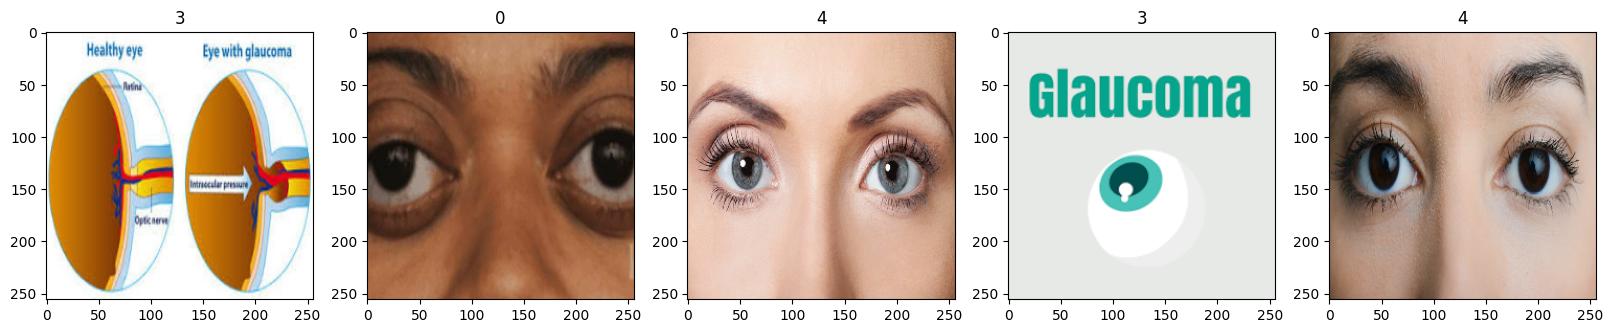

In [16]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
scaled = batch[0] / 255

In [18]:
data = data.map(lambda x, y: (x / 255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

In [21]:
batch[0].max()

1.0

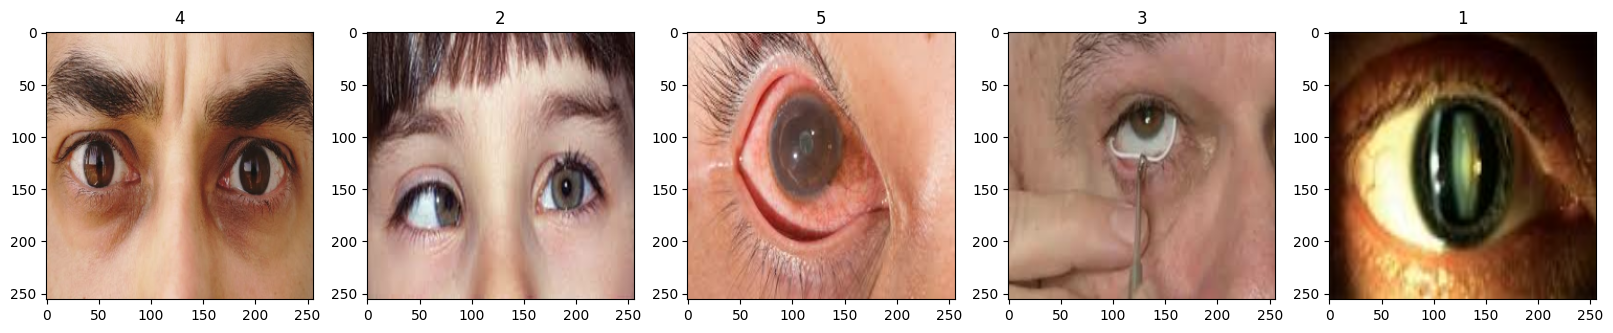

In [22]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)


18

In [24]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 2

train_size 

12

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

model = Sequential()


model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(6, activation = 'softmax'))


model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 100, validation_data = val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         1

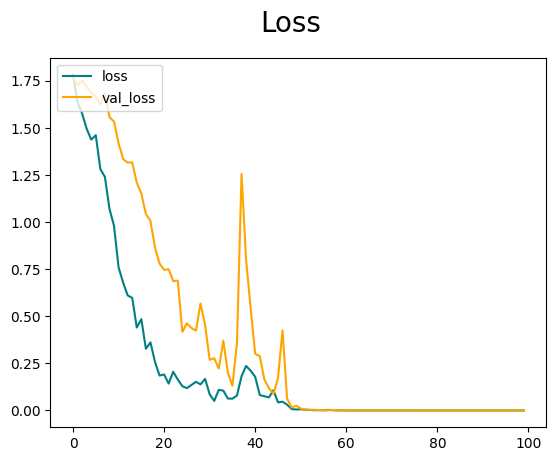

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

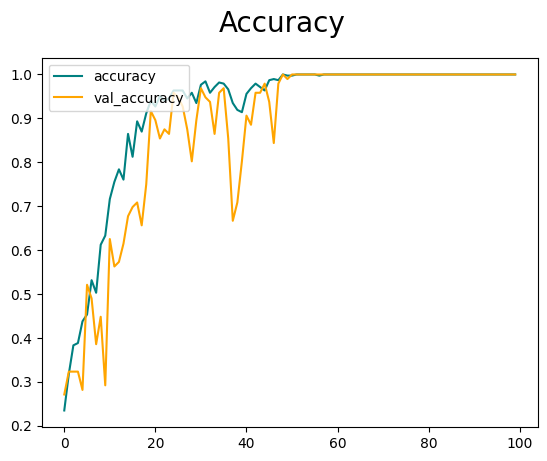

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

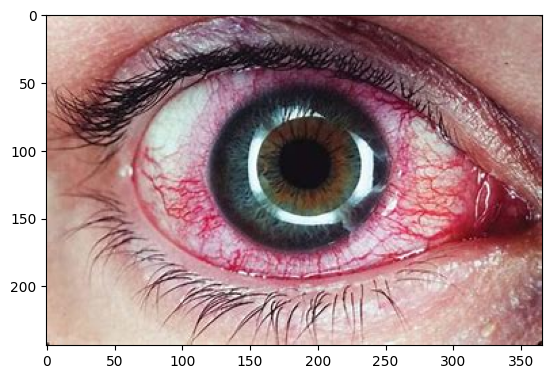

In [29]:
#You can test the NN here by passing in an image
img = cv2.imread('C:/Users/Ethan/OneDrive/Documents/GitHub/EyeCU/test_images/uveitistest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

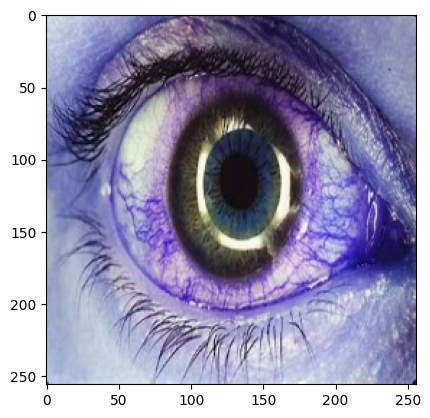

In [30]:
#Have to resize the image before we pass it into the NN
resize = tf.image.resize(img, (256, 256))
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:

preds = np.round(model.predict(batch[0]), 1)
#r = np.round(preds,5).argmax()
#r
preds
for i in range(6):
    for j in range(6):
        if preds[i][j] == 1:
            print('This image belongs to: ' + classes[j])
            
    

1/1 [==============================] - 0s 241ms/step
This image belongs to: Healthy Eyes
This image belongs to: Crossed Eyes
This image belongs to: Uveitits
This image belongs to: Glaucoma
This image belongs to: Cataracts
This image belongs to: Crossed Eyes


In [32]:
pred = np.round(preds,6).argmax()


print(preds[0])

pred_labels = []

for i in range(6):
    r = np.round(preds[i],0).argmax()
    print(r)
    if r ==0 : pred_labels.append("Bulging Eyes")
    elif r ==1: pred_labels.append("Cataracts")
    elif r ==2: pred_labels.append("Crossed Eyes")
    elif r ==3: pred_labels.append("Glaucoma")
    elif r ==4: pred_labels.append("Healthy Eyes")
    elif r ==5: pred_labels.append("Uveitis")

[0. 0. 0. 0. 1. 0.]
4
2
5
3
1
2


(6, 256, 256, 3)


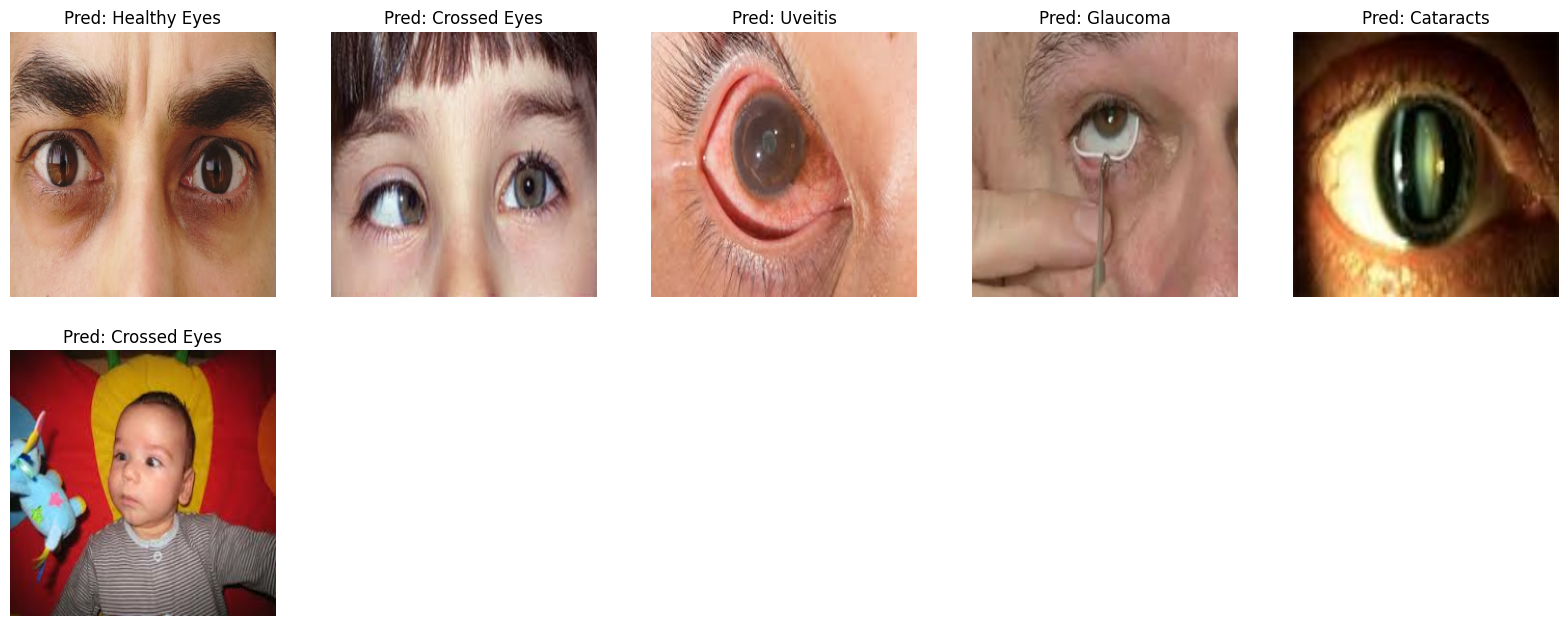

In [33]:
images = batch[0][:6]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, 7):
    img = images[m-1].reshape([256, 256, 3])
    fig.add_subplot(5, 5, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()

In [34]:

img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)
np.argmax(score)
score

1/1 [==============================] - 0s 101ms/step
This image most likely belongs to Glaucoma with a 35.22 percent confidence.


<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12956253, 0.12956253, 0.12956253, 0.35218745, 0.12956253,
        0.12956253]], dtype=float32)>